### Capstone Project-2 Auto Insurance Fraud Detection

## Exploratory Data Analysis


In [33]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Show plots inline
%matplotlib inline


In [34]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [35]:
# load data set
data = pd.read_csv('fraud_detect_cleaned.csv',index_col=0)
data.shape

(15045, 32)

In [36]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,No,No,External,none,no change,1 vehicle,1994,Collision


In [37]:
# unique values of features
for i in data.columns:
    print((i),"-->",data[i].unique(),"\n")

Month --> ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep' 'Nov'] 

WeekOfMonth --> [5 3 2 4 1] 

DayOfWeek --> ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday'] 

Make --> ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus'] 

AccidentArea --> ['Urban' 'Rural'] 

DayOfWeekClaimed --> ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'] 

MonthClaimed --> ['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Apr' 'Mar' 'Aug' 'May' 'Jun' 'Sep' 'Oct'] 

WeekOfMonthClaimed --> [1 4 2 3 5] 

Sex --> ['Female' 'Male'] 

MaritalStatus --> ['Single' 'Married' 'Widow' 'Divorced'] 

Age --> [21 34 47 65 27 20 36 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55 35
 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43 57
 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66] 

Fault --> ['Policy Holder' 'Third Party'] 

PolicyType --

In [38]:
# replace values "none",'new' and 'no change' to 0 or 1

In [39]:
data['PastNumberOfClaims'] = data['PastNumberOfClaims'].replace('none',0)

In [40]:
data['NumberOfSuppliments'] = data['NumberOfSuppliments'].replace('none',0)

In [41]:
data['AddressChange_Claim'] = data['AddressChange_Claim'].replace('no change',0).replace('under 6 months',0)

In [42]:
data['AgeOfVehicle'] = data['AgeOfVehicle'].replace('new',1)

In [43]:
# change features type object to int
pattern = r'(\d+)'
col = ['NumberOfCars','NumberOfSuppliments','PastNumberOfClaims', 'Days_Policy_Claim', 'Days_Policy_Accident', 'VehiclePrice','AgeOfVehicle','AddressChange_Claim']
for column in col:
    # Convert the column to string type
    data[column] = data[column].astype(str)
    
    # Use regex to extract the first number from each value
    data[column] = data[column].str.extract(pattern, expand=False)
    data[column]= data[column].astype('int')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15045 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15045 non-null  object
 1   WeekOfMonth           15045 non-null  int64 
 2   DayOfWeek             15045 non-null  object
 3   Make                  15045 non-null  object
 4   AccidentArea          15045 non-null  object
 5   DayOfWeekClaimed      15045 non-null  object
 6   MonthClaimed          15045 non-null  object
 7   WeekOfMonthClaimed    15045 non-null  int64 
 8   Sex                   15045 non-null  object
 9   MaritalStatus         15045 non-null  object
 10  Age                   15045 non-null  int64 
 11  Fault                 15045 non-null  object
 12  PolicyType            15045 non-null  object
 13  VehicleCategory       15045 non-null  object
 14  VehiclePrice          15045 non-null  int32 
 15  FraudFound_P          15045 non-null  int

In [45]:
pd.set_option('display.max_columns',None)
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,69000,0,1,12,300,1,30,30,0,3,No,No,External,0,1,3,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,69000,0,2,15,400,4,30,30,0,6,Yes,No,External,0,0,1,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,69000,0,3,7,400,3,30,30,1,7,No,No,External,0,0,1,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000,0,4,4,400,2,30,30,1,7,Yes,No,External,5,0,1,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,69000,0,5,3,400,1,30,30,0,5,No,No,External,0,0,1,1994,Collision


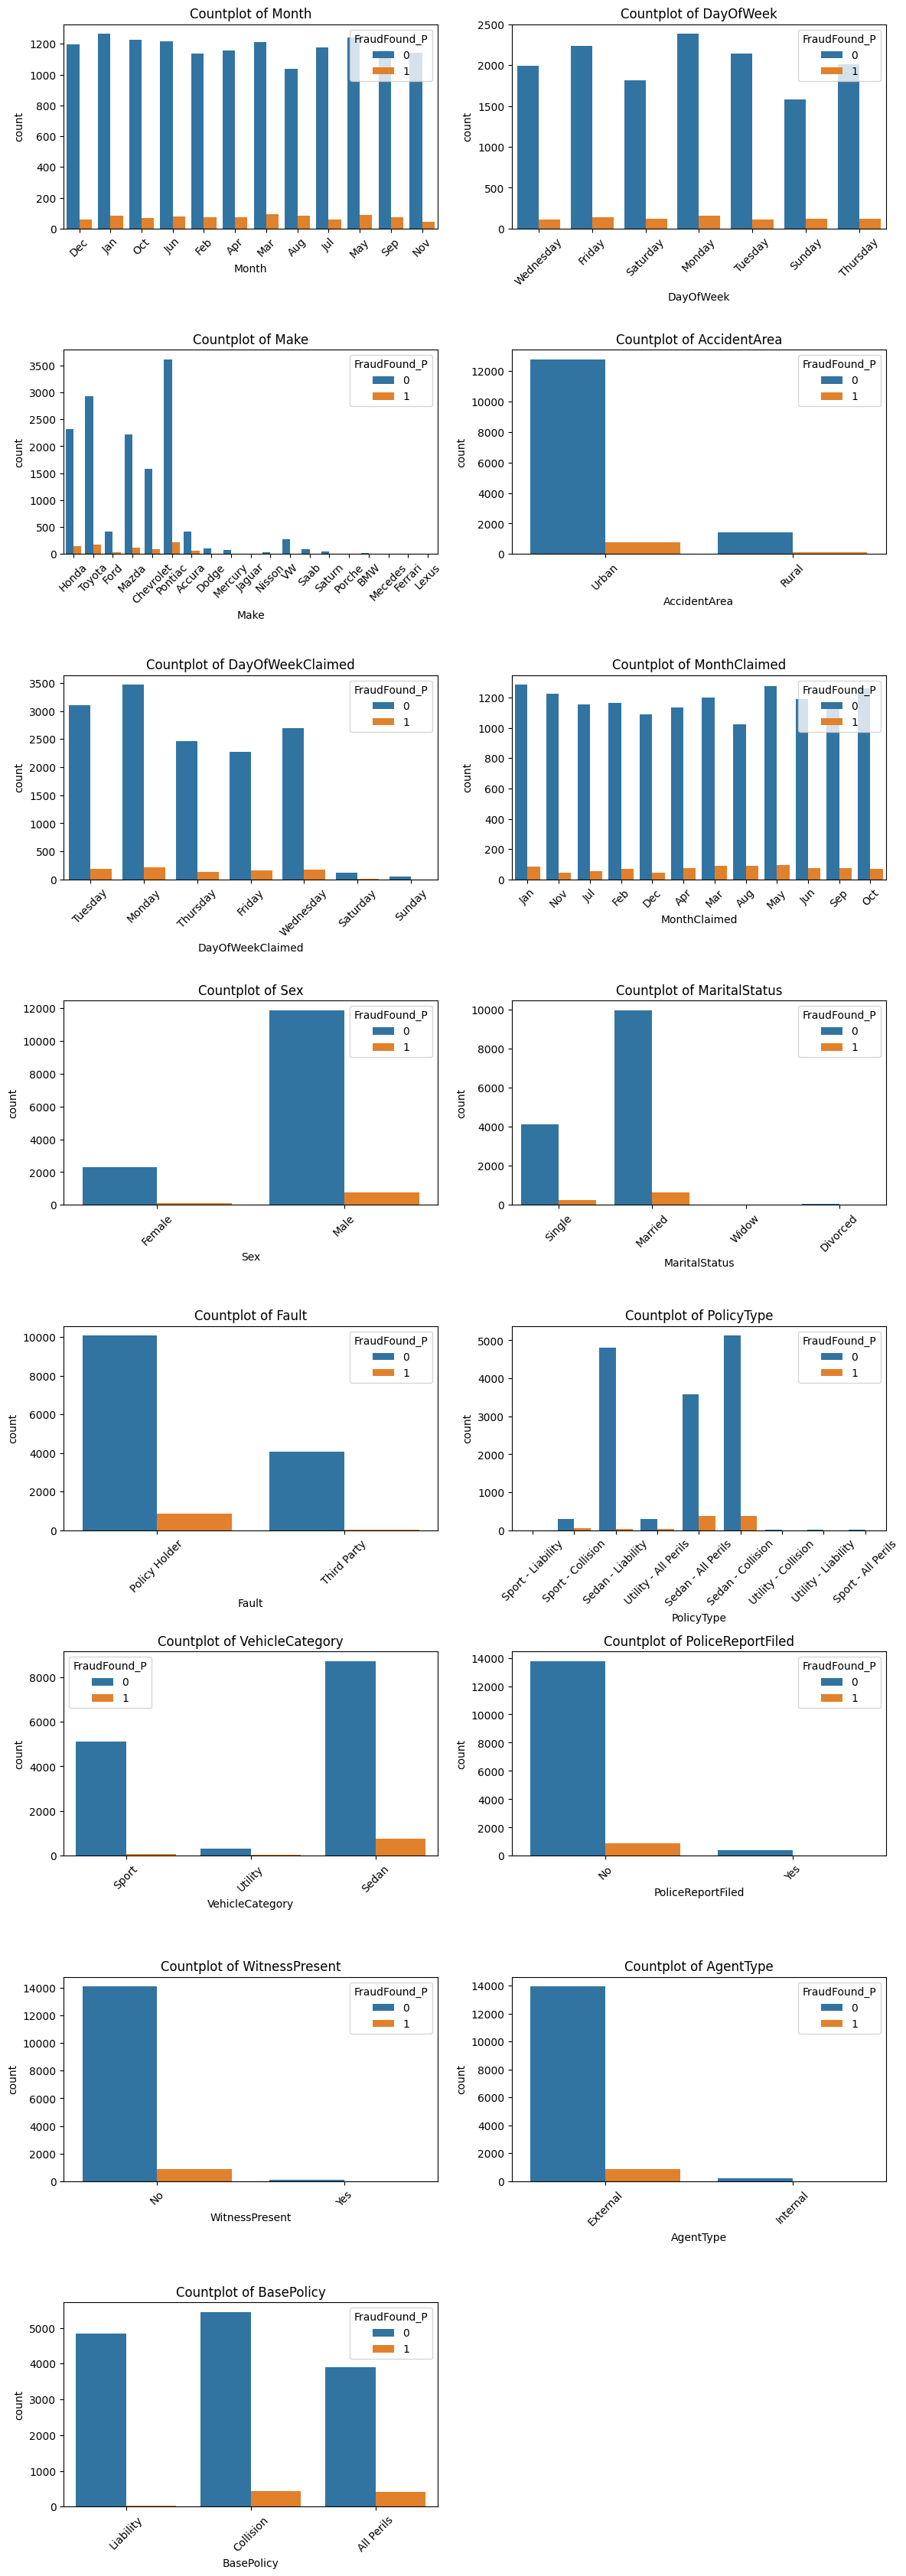

In [46]:
# Categorical features visualization
fea = [i  for i in data.columns if data[i].dtype==object and i != 'FraudFound_P']

fig, axes =plt.subplots(12,2,figsize=(12,50))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

i=0
for fea_name in fea:
     ax= axes[i//2, i%2]
     i += 1
     sns.countplot(x=fea_name, data=data, ax=ax,  hue='FraudFound_P')
     ax.set_title(f'Countplot of {fea_name}')
     ax.tick_params(axis='x', rotation=45)

for i in range(len(fea), 12 * 2):
    fig.delaxes(axes[i//2, i%2])

plt.tight_layout()
plt.show()

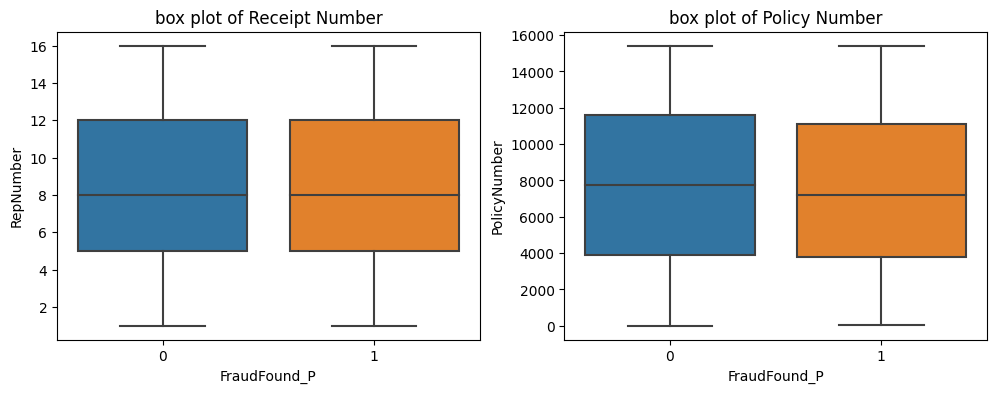

In [47]:
# boxplot of 'Policy Number & 'Policy Number'
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
sns.boxplot(data= data, y=data["RepNumber"], x=data["FraudFound_P"],ax=ax1 )
ax1.set_title('box plot of Receipt Number')
sns.boxplot(data= data, y=data["PolicyNumber"], x=data["FraudFound_P"],ax=ax2 )
ax2.set_title('box plot of Policy Number')

plt.show()

In [48]:
# After exploring we decide to remove this 2 category
data.drop(columns=['RepNumber', 'PolicyNumber'], inplace=True)

In [49]:
data.shape

(15045, 30)

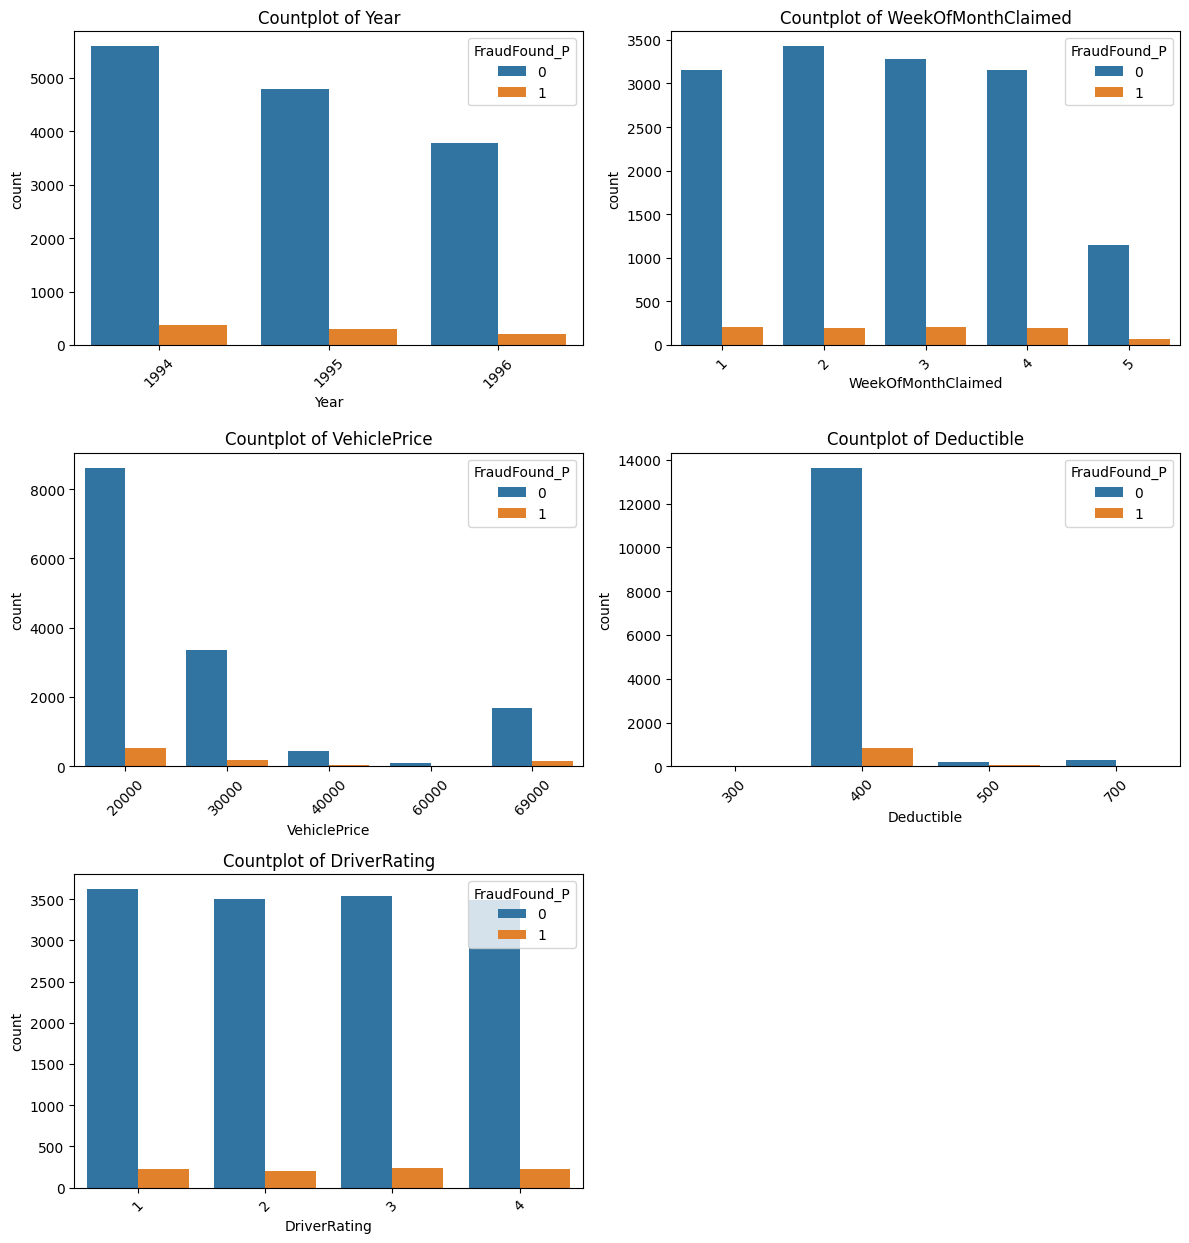

In [50]:
# Numerical features visualization
fea=['Year', 'WeekOfMonthClaimed', 'VehiclePrice','Deductible','DriverRating' ]
fig, axes =plt.subplots(12,2,figsize=(12,50))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

i=0
for fea_name in fea:
     ax= axes[i//2, i%2]
     i += 1
     sns.countplot(x=fea_name, data=data, ax=ax,  hue='FraudFound_P')
     ax.set_title(f'Countplot of {fea_name}')
     ax.tick_params(axis='x', rotation=45)

for i in range(len(fea), 12 * 2):
    fig.delaxes(axes[i//2, i%2])

plt.tight_layout()
plt.show()

<Figure size 300x800 with 0 Axes>

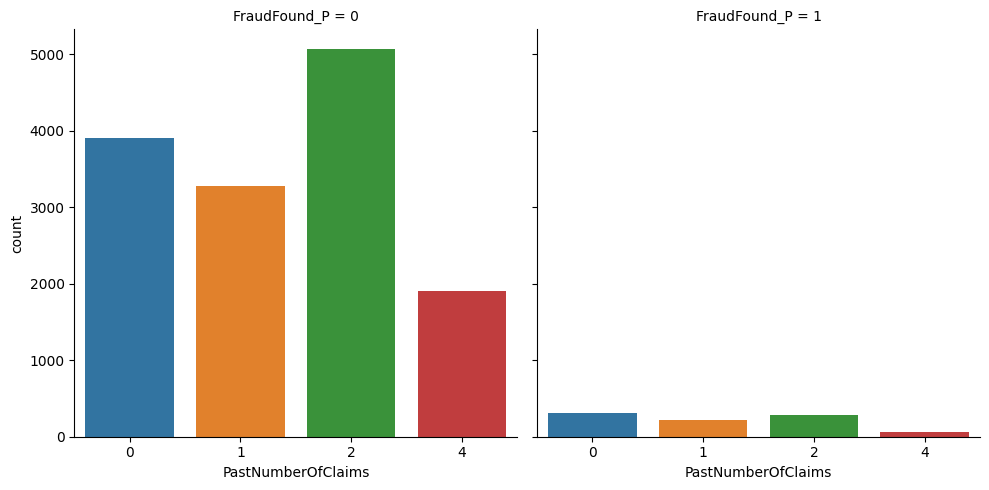

In [51]:
plt.figure(figsize=(3,8))
sns.catplot(x="PastNumberOfClaims", data=data,
            kind="count", col="FraudFound_P")
plt.show()

In [52]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,69000,0,300,1,30,30,0,3,No,No,External,0,1,3,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,69000,0,400,4,30,30,0,6,Yes,No,External,0,0,1,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,69000,0,400,3,30,30,1,7,No,No,External,0,0,1,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000,0,400,2,30,30,1,7,Yes,No,External,5,0,1,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,69000,0,400,1,30,30,0,5,No,No,External,0,0,1,1994,Collision


In [53]:
# plt.figure(figsize=(10,10))
# mask = np.triu(np.ones_like(data.corr(numeric_only=True), dtype = bool))
# sns.heatmap(data.corr(numeric_only=True),mask = mask, cmap='coolwarm', annot=True, fmt='.1g')

<Axes: >

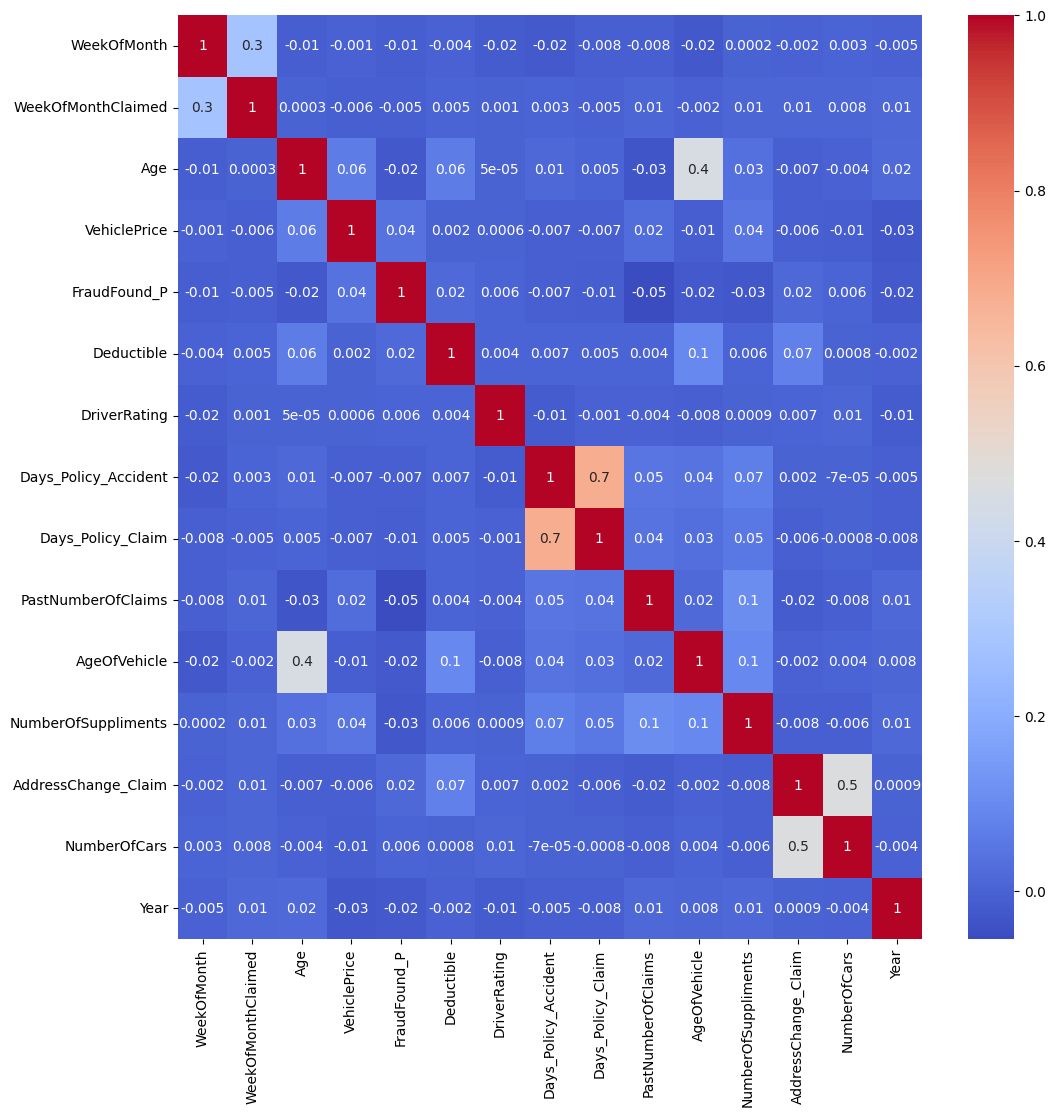

In [54]:
# sns.heatmap(data.corr(), cmap='coolwarm')
plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(numeric_only=True),cmap='coolwarm', annot=True, fmt='.1g')

In [55]:
# After analyzing the heat map, I have decided to remove features that are highly correlated.
drop = ['WeekOfMonth','WeekOfMonthClaimed','Year','AgeOfVehicle','AddressChange_Claim','Days_Policy_Claim']
df = data.drop(columns=drop)

<Axes: >

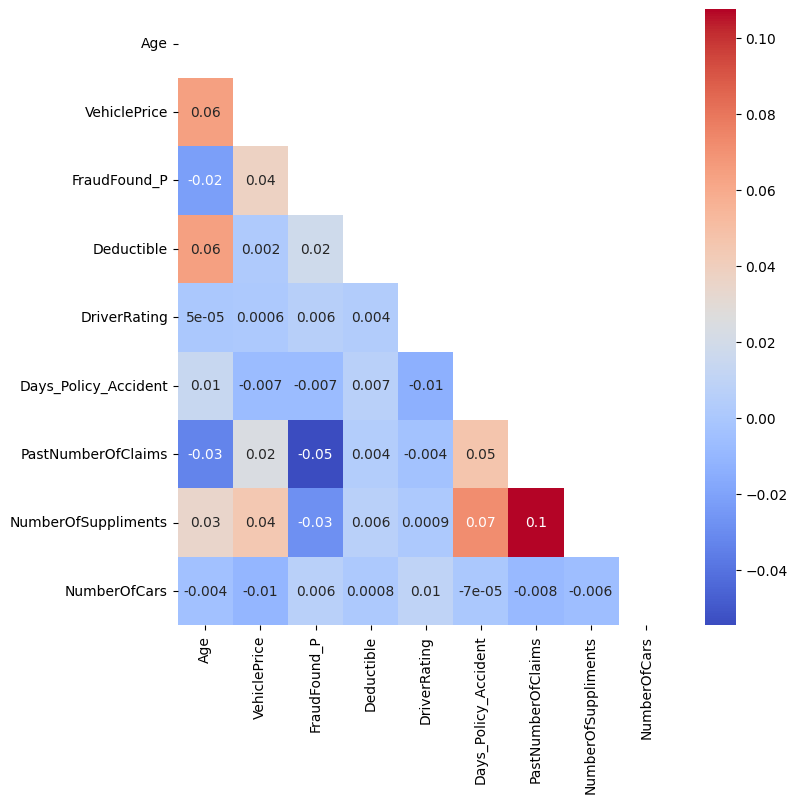

In [56]:
plt.figure(figsize=(8,8))
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype = bool))
sns.heatmap(df.corr(numeric_only=True),mask = mask, cmap='coolwarm', annot=True, fmt='.1g')

In [57]:
df.head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,PastNumberOfClaims,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,21,Policy Holder,Sport - Liability,Sport,69000,0,300,1,30,0,No,No,External,0,3,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,34,Policy Holder,Sport - Collision,Sport,69000,0,400,4,30,0,Yes,No,External,0,1,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,47,Policy Holder,Sport - Collision,Sport,69000,0,400,3,30,1,No,No,External,0,1,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,65,Third Party,Sedan - Liability,Sport,20000,0,400,2,30,1,Yes,No,External,5,1,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,27,Third Party,Sport - Collision,Sport,69000,0,400,1,30,0,No,No,External,0,1,Collision


In [58]:
df.to_parquet('fraud_eda.parquet')